In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import  Axes3D

This time, we will be using Synthetic data i.e. we will be creating a dataset.

WHY?

Synthetic data helps us in understanding the behavior and quirks of any ML algorithm as it helps to see where it succeeds and where it fails.

In [3]:
# Creating

N = 1000
X = np.random.random( (N,2) ) * 6 - 3
# uniformly distributed data between (-3, +3)
print(X)

[[-0.09754775  2.64038369]
 [ 1.90430553 -1.63344379]
 [ 1.1549193  -2.73092182]
 ...
 [-2.7183326  -2.08251395]
 [-0.30798396  2.57694762]
 [ 2.85080002 -0.48225697]]


In [4]:
X.shape

(1000, 2)

In [5]:
np.max(X)

2.9980049580732366

In [6]:
np.min(X)

-2.9947270826323775

In [7]:
np.median(X)

-0.19632689110003398

In [8]:
np.mean(X)

-0.1096470583136659

In [9]:
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])
# We calculate Y by using some random formula
print(Y[:6])

[ 0.91391023 -0.59883181 -1.00592064  0.18435453 -0.15094494  0.03897057]


The function which we are implementing is as follows:

y = cos(2 * x1) + cos(3 * x2)

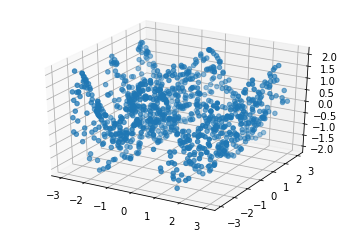

In [10]:
# Plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111#:~:text=Loading%20when%20this%20answer%20was,2x3%20grid%2C%204th%20subplot%22.
ax.scatter( X[:,0], X[:,1], Y )
plt.show();

In [11]:
# Build the model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
                                    tf.keras.layers.Dense(1)
])

In [12]:
# Compile the model

opt = tf.keras.optimizers.Adam(0.01)

model.compile(optimizer=opt,
              loss='mse'
              )

In [13]:
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 874us/step - loss: 1.0131
Epoch 2/100
32/32 [==============================] - 0s 792us/step - loss: 0.9664
Epoch 3/100
32/32 [==============================] - 0s 824us/step - loss: 0.9497
Epoch 4/100
32/32 [==============================] - 0s 796us/step - loss: 0.8733
Epoch 5/100
32/32 [==============================] - 0s 872us/step - loss: 0.7979
Epoch 6/100
32/32 [==============================] - 0s 943us/step - loss: 0.7391
Epoch 7/100
32/32 [==============================] - 0s 838us/step - loss: 0.6858
Epoch 8/100
32/32 [==============================] - 0s 867us/step - loss: 0.6643
Epoch 9/100
32/32 [==============================] - 0s 739us/step - loss: 0.6416
Epoch 10/100
32/32 [==============================] - 0s 819us/step - loss: 0.6121
Epoch 11/100
32/32 [==============================] - 0s 824us/step - loss: 0.5943
Epoch 12/100
32/32 [==============================] - 0s 857us/step - loss: 0.5813
Epoch 13/100


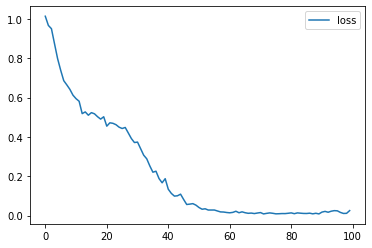

In [14]:
# Plot loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.legend();

In [15]:
np.linspace(0,6,5)

array([0. , 1.5, 3. , 4.5, 6. ])

In [ ]:
import numpy as np  
na, nb = (5, 3)  
a = np.linspace(1, 2, na)  
b = np.linspace(1, 2, nb)  
print(a,"\n")
print(b,"\n\n\n")
xa, xb = np.meshgrid(a, b)  
print(xa,"\n")  
print(xb )
# https://www.javatpoint.com/numpy-meshgrid

[1.   1.25 1.5  1.75 2.  ] 

[1.  1.5 2. ] 



[[1.   1.25 1.5  1.75 2.  ]
 [1.   1.25 1.5  1.75 2.  ]
 [1.   1.25 1.5  1.75 2.  ]] 

[[1.  1.  1.  1.  1. ]
 [1.5 1.5 1.5 1.5 1.5]
 [2.  2.  2.  2.  2. ]]


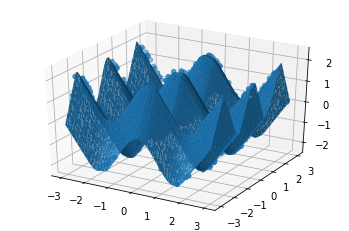

In [29]:
# Plot the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

# surface plot
line = np.linspace(-3,+3,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show();

NN manages to approximate very well in this case.

In [18]:
xx.shape,yy.shape

((50, 50), (50, 50))

In [21]:
xx.flatten().shape

(2500,)

In [22]:
xx.flatten().T.shape

(2500,)

In [23]:
np.vstack((xx.flatten(), yy.flatten())).shape

(2, 2500)

In [24]:
np.vstack((xx.flatten(), yy.flatten())).T.shape

(2500, 2)

In [20]:
Xgrid.shape

(2500, 2)

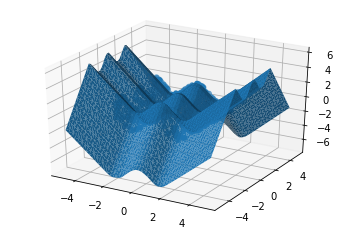

In [32]:
# Can my NN extrapolate?

# Plot the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

# surface plot
line = np.linspace(-5,+5,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show();

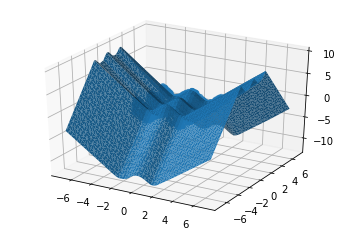

In [33]:
# Can my NN extrapolate?

# Plot the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

# surface plot
line = np.linspace(-7,+7,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show();

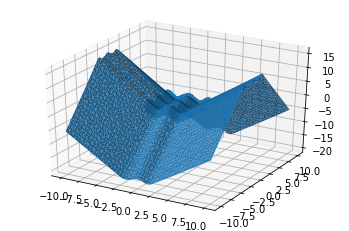

In [34]:
# Can my NN extrapolate?

# Plot the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

# surface plot
line = np.linspace(-10,+10,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show();

**Observation:**

It doesnt work quite well. Infact, it assumes that the pattern keeps going in the direction it was going at the edges.